# Tarea N°3 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

## Introducción

En la presente tarea, se experimenta con algoritmos relacionados con redes neuronales artificiales, y ensamblado de máquinas con árboles de clasificación. La mayor parte de los algoritmos probados, corresponden a las implementaciones de Scikit-Learn, excepto por Extreme Learning Machines y Bagging que fueron implementadas, manteniendo la compatibilidad con dicha biblioteca.

Donde corresponda, se realiza stratified 5-fold cross validation para la selección de los parámetros óptimos. Por temas de espacio, sólo se muestran los resultados de tal proceso en 2 datasets de los 20. Se muestra también histogramas de los mejores parámetros sobre los 20 datasets.

Para la comparación de los errores, se realizan error bars con el promedio del error sobre los 20 datasets. Las barras de error son computadas con el intervalo de confianza (del 90%) de la media del error ocupando la t-student.

Para los algoritmos sensibles a la representación de los datos (Redes Neuronales), se realiza normalización de estos. Se hicieron pruebas de concepto con varios escalamientos: [-3, 3], [-1, 1], [-0.5, 0.5] y normalización. Como los resultados no se vieron afectados en mayor entre estos, se decidió ocupar normalización. Para los algoritmos de ensamblado no se realiza ninguna transformación de datos, puesto que los learners utilizados son árboles de decisión, los cuales se sabe no son invariantes a transformaciones de la data.

Todos los algoritmos aquí probados corresponden a la implementaciones presentes en Scikit-Learn v0.18.

## 1. Feedforward ANN sin weight decay

Se prueba a continuación un red Feedforward con una capa oculta. El algoritmo de optimización ocupado corresponde al clásico stochastic gradient descent con learning rate constante. Como función de activación se ocupa la también clásica función logística. 

Los parámetros que se muestran a continuación; tamaño de la capa escondida (número de unidades) y learning rate, son los que se prueban en la configuración del cross-validation. 

In [12]:
#parameters to try on MPL
mlp_params = {'hidden_layer_sizes':[(25,),(50,),(75,),(100,),(125)], 'learning_rate_init':[0.05, 0.075, 0.1, 0.125, 0.15]}

##############################################################
Dataset: 3
Best parameter: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (100,)}
CV scores:
mean: 0.77083, std: 0.02547, params: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (25,)}
mean: 0.77257, std: 0.02442, params: {'learning_rate_init': 0.075, 'hidden_layer_sizes': (25,)}
mean: 0.77604, std: 0.02697, params: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (25,)}
mean: 0.77778, std: 0.01954, params: {'learning_rate_init': 0.125, 'hidden_layer_sizes': (25,)}
mean: 0.77083, std: 0.02192, params: {'learning_rate_init': 0.15, 'hidden_layer_sizes': (25,)}
mean: 0.77604, std: 0.02825, params: {'learning_rate_init': 0.05, 'hidden_layer_sizes': (50,)}
mean: 0.77604, std: 0.01985, params: {'learning_rate_init': 0.075, 'hidden_layer_sizes': (50,)}
mean: 0.77083, std: 0.02801, params: {'learning_rate_init': 0.1, 'hidden_layer_sizes': (50,)}
mean: 0.77257, std: 0.02307, params: {'learning_rate_init': 0.125, 'hidden_layer

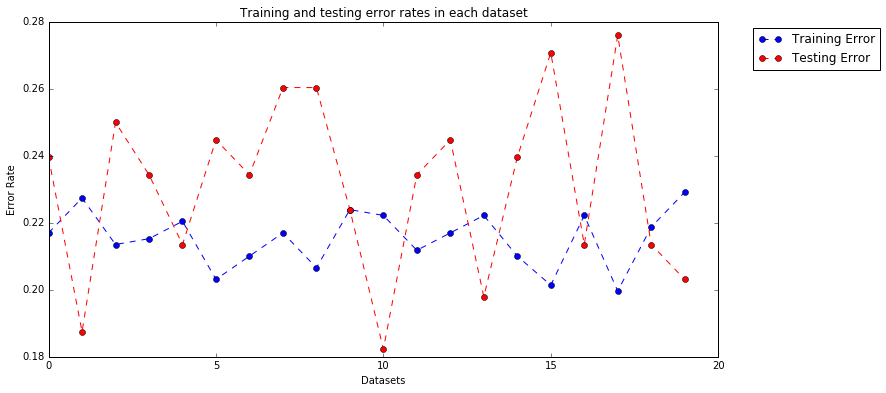

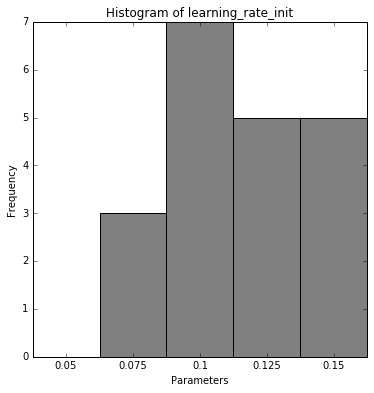

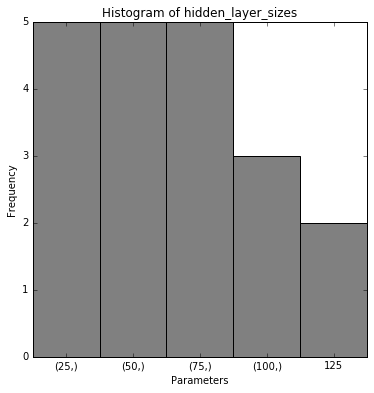

In [13]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant', alpha=0.)
mlp_tr_err, mlp_ts_err = solve_clf(mlp, params=mlp_params, show=[3,17])

**Comentarios u Observaciones:**
- Se ve claramente la presencia de overfitting en las diferencias de training y testing errors.
- El learning rate que mejor resultados obtiene, es el más alto dentro de los posible a elegir.
- El histograma del tamaño de la capa oculta no muestra una distribución muy clara. Sin embargo era esperable que al aumentar el número de capas, la red pueda computar soluciones mucho más complejas y por lo tanto caer en overfitting.

## 2. Feedforward ANN con weight decay

Para la siguiente red Feedforward, se ocupan los parámetros que mejor desempeño obtuvieron en la experiencia anterior. Estos son:
1. learning_rate_init = 0.15
2. hiden_layer\_sizes = 100

y sobre esta configuración se agrega weight decay, por medio del término de regularización correspondiente:
$$
\alpha \left( \sum_{r,q} w_{rq}^2 + \sum_{q,i} w_{q,i}^2 \right)
$$

donde el parámetro de control es $\alpha$ (simbolo ocupado en Scikit). Los parámetros que se muestran a continuación son lo $\alpha$'s que se prueban para la configuración del cross-validation.

In [14]:
#parameters to try on MPL
mlp_wd_params = {'alpha':[0.005, 0.01, 0.05, 0.1, 0.5]}

##############################################################
Dataset: 3
Best parameter: {'alpha': 0.005}
CV scores:
mean: 0.77778, std: 0.02408, params: {'alpha': 0.005}
mean: 0.77257, std: 0.01586, params: {'alpha': 0.01}
mean: 0.77257, std: 0.01575, params: {'alpha': 0.05}
mean: 0.76042, std: 0.03399, params: {'alpha': 0.1}
mean: 0.75000, std: 0.04250, params: {'alpha': 0.5}
Training error: 0.211805555556
Testing error: 0.234375
##############################################################


##############################################################
Dataset: 17
Best parameter: {'alpha': 0.1}
CV scores:
mean: 0.77951, std: 0.02827, params: {'alpha': 0.005}
mean: 0.77778, std: 0.02671, params: {'alpha': 0.01}
mean: 0.76562, std: 0.01806, params: {'alpha': 0.05}
mean: 0.78993, std: 0.01410, params: {'alpha': 0.1}
mean: 0.76910, std: 0.02999, params: {'alpha': 0.5}
Training error: 0.203125
Testing error: 0.270833333333
##############################################################

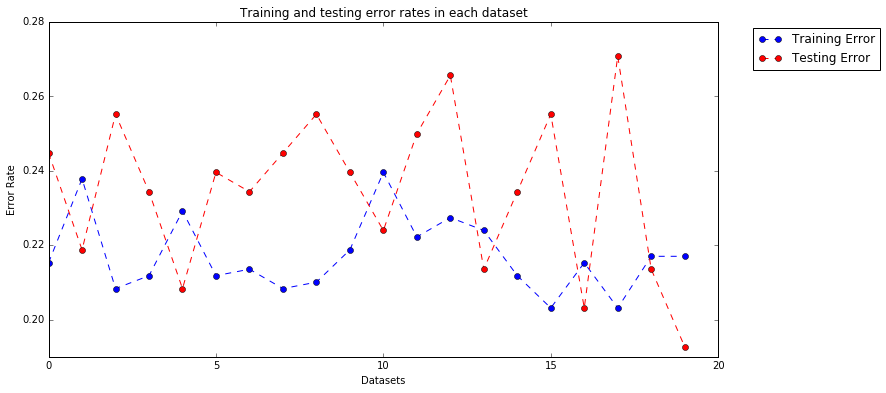

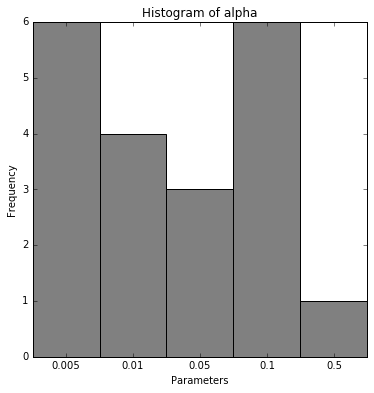

In [15]:
mlp = MLPClassifier(activation='logistic', algorithm='sgd', learning_rate='constant', 
                    learning_rate_init=0.15, hidden_layer_sizes=(100,))
mlp_wd_tr_err, mlp_wd_ts_err = solve_clf(mlp, params=mlp_wd_params, show=[3,17])

**Comentarios u observaciones:**
- Se ve una leve tendencia a disminuir las diferencias entre los errores de training y testing. Esta diferencia queda más clara en las sección de comparaciones.

## 3. Extreme Learning Machine

La implementación de ELM aquí probada, corresponde a la implementación propia que puede verse en los anexos de código. Respecto de la implementación, se hace notar lo siguiente:
- La inicialización aleatoria de pesos, se hacer con numpy.random.random que generan valores aleatorios uniformemente distribuidos. Los valores de estos pesos están en el rango [-0.5, 0.5].
- La función de activación ocupada corresponde a la sigmoidal.
- En la capa de salida se realiza logistic regression clásica (pues el problema es de dos clases).

el parámetro de cantidad de unidades de la capa oculta a ocupar en cross-validation se muestra a continuación:

In [16]:
elm_params = {'n_hidden':[50,100,150,200,250]}

##############################################################
Dataset: 3
Best parameter: {'n_hidden': 100}
CV scores:
mean: 0.77778, std: 0.02399, params: {'n_hidden': 50}
mean: 0.77951, std: 0.02645, params: {'n_hidden': 100}
mean: 0.77083, std: 0.02881, params: {'n_hidden': 150}
mean: 0.77604, std: 0.02098, params: {'n_hidden': 200}
mean: 0.77431, std: 0.02547, params: {'n_hidden': 250}
Training error: 0.211805555556
Testing error: 0.21875
##############################################################


##############################################################
Dataset: 17
Best parameter: {'n_hidden': 50}
CV scores:
mean: 0.78472, std: 0.01491, params: {'n_hidden': 50}
mean: 0.78125, std: 0.02530, params: {'n_hidden': 100}
mean: 0.77431, std: 0.01839, params: {'n_hidden': 150}
mean: 0.77431, std: 0.01839, params: {'n_hidden': 200}
mean: 0.77778, std: 0.01527, params: {'n_hidden': 250}
Training error: 0.204861111111
Testing error: 0.286458333333
##################################

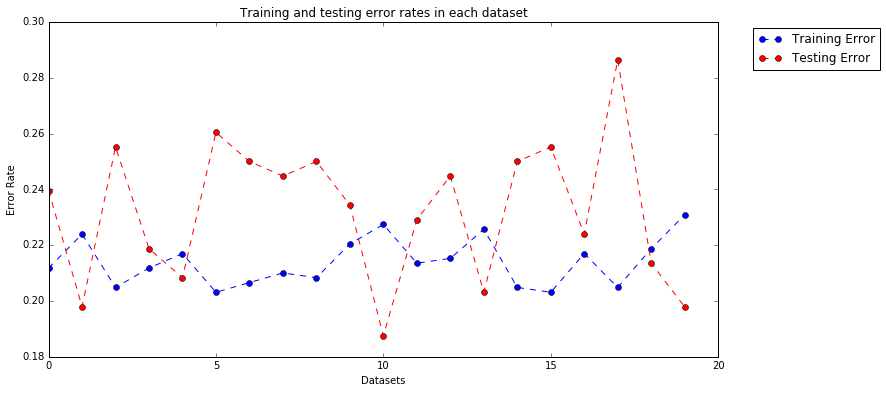

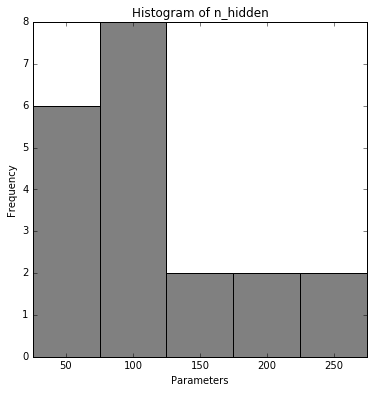

In [17]:
elm = ELM()
elm_tr_err, elm_ts_err = solve_clf(elm, params=elm_params, show=[3,17])

**Comentarios u observaciones:**
- A pesar de que los pesos que conectan la capa de entrada con la oculta, se inicializan aleatoriamente y no cambian con el tiempo (no se aprenden), lo resultados obtenidos por este algoritmo es bastante bueno (que más claro en la sección de comparaciones).
- Se ve claramente también que el aumentar la cantidad de nodos en la capa oculta no favorece los resultados de validación que obtiene la red, pues probablemente cae en overfitting.

## 4. AdaBoost

Se prueba a continuación el algoritmo Adaboost con árboles de clasificación de profundidad 1, variando el número de máquinas entre 5, 10, 15 y 20 respectivamente. Se hacen las siguientes observaciones:
- No se realizó escalamiento alguno en los datos. Esto pues, los learners ocupados para el ensamblado son todos árboles de decisión, lo cuales se sabe son invariantes a su forma de representación.
- La implementación de Scikit-Learn implementa AdaBoost-SAMME.

In [18]:
#adaboost with 5 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=5)
ada5_1_tr_err, ada5_1_ts_err = solve_clf(clf, scale=False, show=[])

#adaboost with 10 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=10)
ada10_1_tr_err, ada10_1_ts_err = solve_clf(clf, scale=False, show=[])

#adaboost with 15 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=15)
ada15_1_tr_err, ada15_1_ts_err = solve_clf(clf, scale=False, show=[])

#adaboost with 20 trees of depth 1
clf = AdaBoost(base_estimator=DecisionTree(max_depth=1), n_estimators=20)
ada20_1_tr_err, ada20_1_ts_err = solve_clf(clf, scale=False, show=[])

Los resultados que se muestran a continuación corresponden a la variación del error de entrenamiento y testing, respecto a la cantidad de máquinas utilizadas. Los errores son presentados por error bars, correspondientes al intervalo de confianza para la media de error, distribuido t-student.

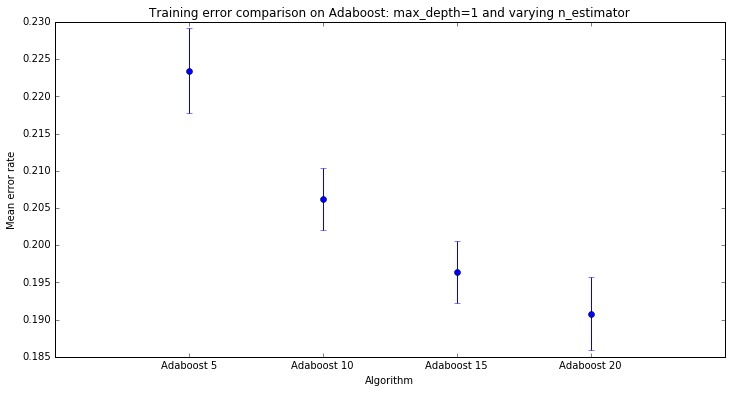

In [19]:
tr_errors = [('Adaboost 5',ada5_1_tr_err), ('Adaboost 10',ada10_1_tr_err), 
             ('Adaboost 15',ada15_1_tr_err), ('Adaboost 20',ada20_1_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Adaboost: max_depth=1 and varying n_estimator')

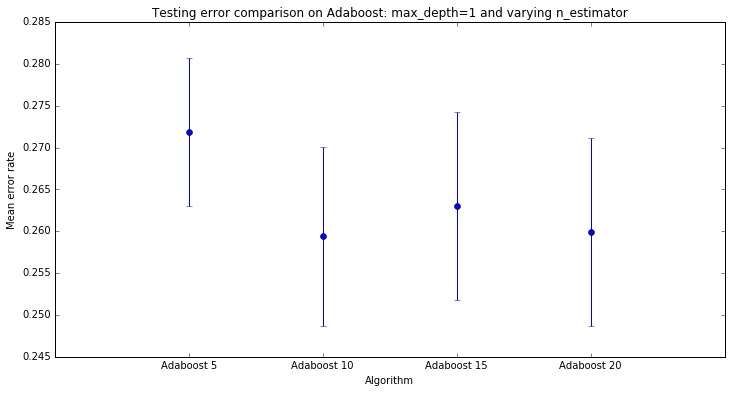

In [20]:
ts_errors = [('Adaboost 5',ada5_1_ts_err), ('Adaboost 10',ada10_1_ts_err), 
             ('Adaboost 15',ada15_1_ts_err), ('Adaboost 20',ada20_1_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Adaboost: max_depth=1 and varying n_estimator')

**Comentarios u observaciones:**
- El training error baja considerablemente al aumentar la cantidad de máquinas, lo cual es bastante consistente con el algoritmo Adaboost, que precisamente en cada iteración adapta sus learners para aprender mejor en los datos (de training) en que está fallando.
- El testing error también presenta mejoras cuando el número de máquinas aumenta.

## 5. Bagging

La implementación de Bagging aquí probada, corresponde a la implementación propia que puede verse en los anexos de código. Respecto de la implementación, se hace notar lo siguiente:
- Cada una de las máquinas, es entrenada con una muestra bootstrap del mismo tamaño que el conjunto de entrenamiento respectivo.
- El criterio de selección del ensamblado corresponde al promedio del output de todas las máquinas, siendo la probabilidad de pertenencia a una clase el output considerado.
- Como las muestras con que entrena Bagging son diferentes en cada fit (por el bootstrapping), entonces se obtienen pequeñas variaciones en los resultados obtenidos cada vez.

In [21]:
#bagging with 5 trees of depth 1
clf = Bagging(n_estimators=5, max_depth=1)
bag5_1_tr_err, bag5_1_ts_err = solve_clf(clf, scale=False, show=[])

#bagging with 10 trees of depth 1
clf = Bagging(n_estimators=10, max_depth=1)
bag10_1_tr_err, bag10_1_ts_err = solve_clf(clf, scale=False, show=[])

#bagging with 15 trees of depth 1
clf = Bagging(n_estimators=15, max_depth=1)
bag15_1_tr_err, bag15_1_ts_err = solve_clf(clf, scale=False, show=[])

#bagging with 20 trees of depth 1
clf = Bagging(n_estimators=20, max_depth=1)
bag20_1_tr_err, bag20_1_ts_err = solve_clf(clf, scale=False, show=[])

Al igual que con Adaboost se muestra a continuación la variación del error de training y testing, respecto a la cantidad de máquinas utilizadas.

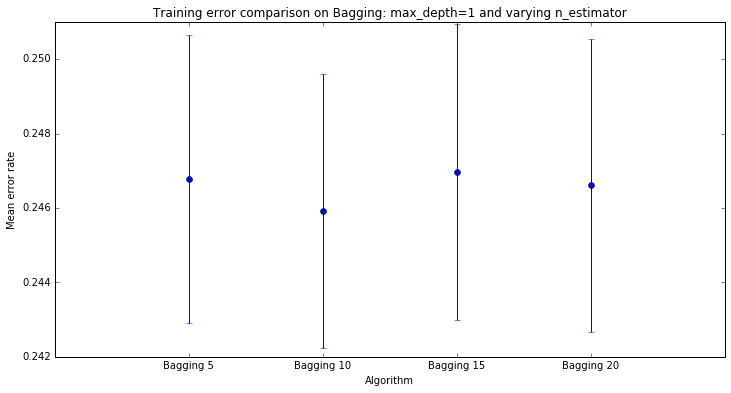

In [22]:
tr_errors = [('Bagging 5',bag5_1_tr_err), ('Bagging 10',bag10_1_tr_err), 
             ('Bagging 15',bag15_1_tr_err), ('Bagging 20',bag20_1_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Bagging: max_depth=1 and varying n_estimator')

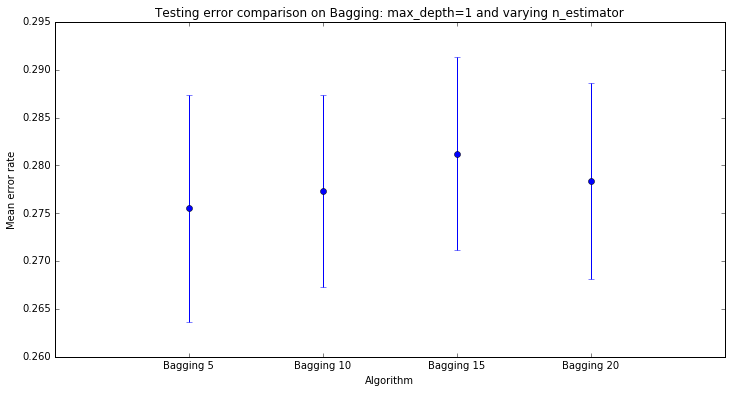

In [23]:
ts_errors = [('Bagging 5',bag5_1_ts_err), ('Bagging 10',bag10_1_ts_err), 
             ('Bagging 15',bag15_1_ts_err), ('Bagging 20',bag20_1_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=1 and varying n_estimator')

**Comentarios u Observaciones:**
- Hay una tendencia a mejorar los resultados (tanto de training como testing) a medida que aumentan el número de máquinas.
- Lo último es consistente con el concepto de _Wisdom of Crowds_, donde a medida que se aumentan los participantes en la decisión (máquinas), se agrega más diversidad y por lo tanto mejores decisiones (clasificación).

## 6. Variando la profundidad de los árboles

En el siguiente punto, se vuelven a realizar Adaboost y Bagging con 5, 10, 15 y 20 máquinas, pero aumentando la profundidad de los árboles a 2 y 3.

### Adaboost con árboles de profundidad 2

In [24]:
#adaboost with 5 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=5)
ada5_2_tr_err, ada5_2_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 10 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=10)
ada10_2_tr_err, ada10_2_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 15 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=15)
ada15_2_tr_err, ada15_2_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 20 trees of depth 2
clf = AdaBoost(base_estimator=DecisionTree(max_depth=2), n_estimators=20)
ada20_2_tr_err, ada20_2_ts_err = solve_clf(clf, scale=False, show=[])

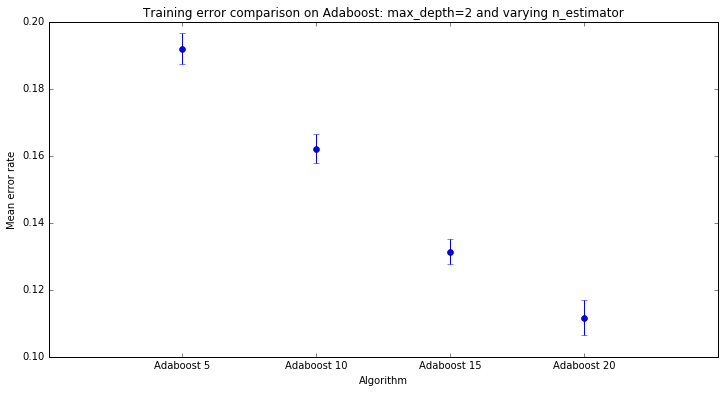

In [25]:
tr_errors = [('Adaboost 5',ada5_2_tr_err), ('Adaboost 10',ada10_2_tr_err), 
             ('Adaboost 15',ada15_2_tr_err), ('Adaboost 20',ada20_2_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Adaboost: max_depth=2 and varying n_estimator')

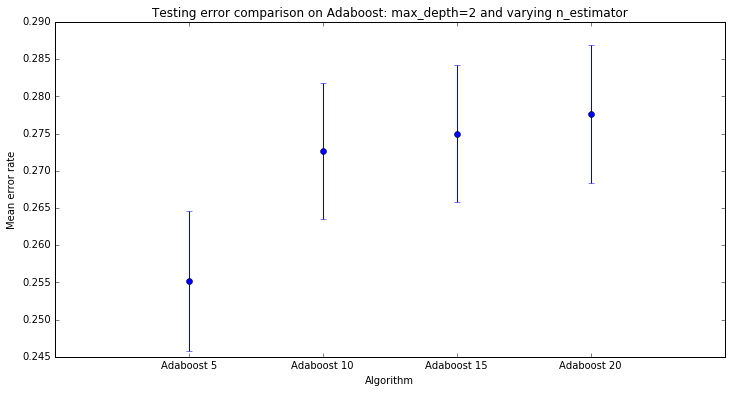

In [26]:
ts_errors = [('Adaboost 5',ada5_2_ts_err), ('Adaboost 10',ada10_2_ts_err), 
             ('Adaboost 15',ada15_2_ts_err), ('Adaboost 20',ada20_2_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Adaboost: max_depth=2 and varying n_estimator')

**Comentarios u observaciones:**
- Al igual que en el caso de árboles de profundidad 1, el training error disminuye en gran cantidad a medida que aumentan la cantidad de máquinas.
- El testing error sin embargo obtiene malos resultados al aumentar el número de máquinas, el cual tiende a aumentar.
- Lo último es una clara evidencia de que el algoritmo está incurriendo en overfitting al aumentar la cantidad de máquinas. Esto es normal, pues mientras más máquinas tenga Adaboost, más posibilidades tiene de ajustarse a la data difícil de clasificar, lo cual hace que clasifique muy bien el training set, en desmedro del testing set.

### Adaboost con árboles de profundidad 3

In [27]:
#adaboost with 5 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=5)
ada5_3_tr_err, ada5_3_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 10 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=10)
ada10_3_tr_err, ada10_3_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 15 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=15)
ada15_3_tr_err, ada15_3_ts_err = solve_clf(clf, scale=False, show=[])
#adaboost with 20 trees of depth 3
clf = AdaBoost(base_estimator=DecisionTree(max_depth=3), n_estimators=20)
ada20_3_tr_err, ada20_3_ts_err = solve_clf(clf, scale=False, show=[])

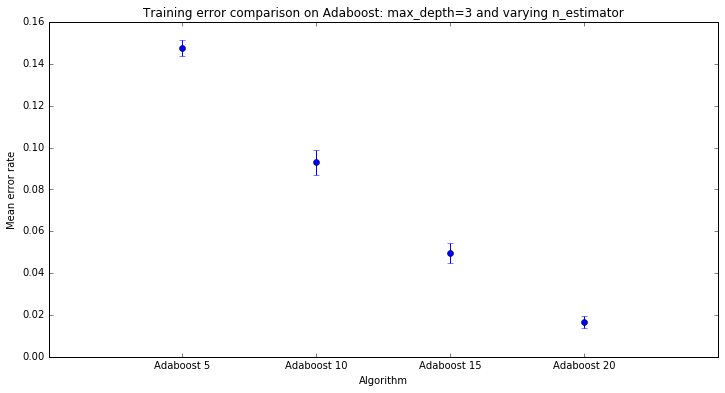

In [28]:
tr_errors = [('Adaboost 5',ada5_3_tr_err), ('Adaboost 10',ada10_3_tr_err), 
             ('Adaboost 15',ada15_3_tr_err), ('Adaboost 20',ada20_3_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Adaboost: max_depth=3 and varying n_estimator')

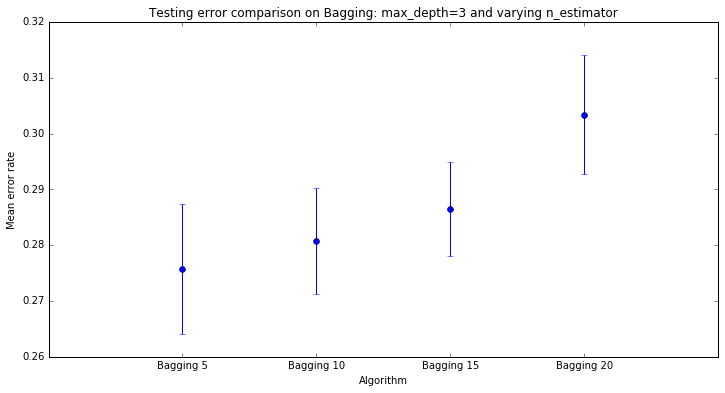

In [29]:
ts_errors = [('Bagging 5',ada5_3_ts_err), ('Bagging 10',ada10_3_ts_err), 
             ('Bagging 15',ada15_3_ts_err), ('Bagging 20',ada20_3_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=3 and varying n_estimator')

**Comentarios u observaciones:**
- Sucede lo mismo que para el caso de árboles de profundidad 2 (para training y testing error).

### Comparación de Adaboost para distinta profundidad de árbol y número de máquinas

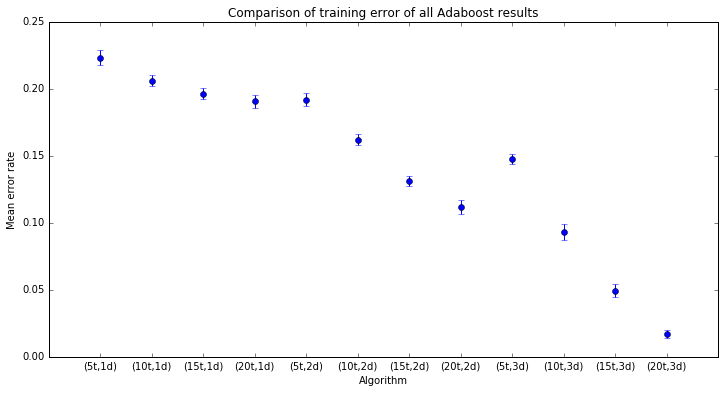

In [30]:
tr_errors = [('(5t,1d)',ada5_1_tr_err),('(10t,1d)',ada10_1_tr_err),('(15t,1d)',ada15_1_tr_err),
             ('(20t,1d)',ada20_1_tr_err),('(5t,2d)',ada5_2_tr_err),('(10t,2d)',ada10_2_tr_err),
             ('(15t,2d)',ada15_2_tr_err),('(20t,2d)',ada20_2_tr_err),('(5t,3d)',ada5_3_tr_err),
             ('(10t,3d)',ada10_3_tr_err),('(15t,3d)',ada15_3_tr_err),('(20t,3d)',ada20_3_tr_err)]
plot_errorbars(tr_errors, "Comparison of training error of all Adaboost results")

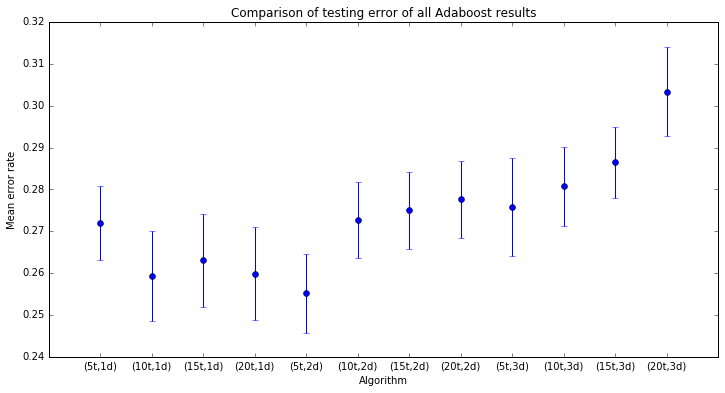

In [31]:
ts_errors = [('(5t,1d)',ada5_1_ts_err),('(10t,1d)',ada10_1_ts_err),('(15t,1d)',ada15_1_ts_err),
             ('(20t,1d)',ada20_1_ts_err),('(5t,2d)',ada5_2_ts_err),('(10t,2d)',ada10_2_ts_err),
             ('(15t,2d)',ada15_2_ts_err),('(20t,2d)',ada20_2_ts_err),('(5t,3d)',ada5_3_ts_err),
             ('(10t,3d)',ada10_3_ts_err),('(15t,3d)',ada15_3_ts_err),('(20t,3d)',ada20_3_ts_err)]
plot_errorbars(ts_errors, "Comparison of testing error of all Adaboost results")

**Comentarios u observaciones:**
- **(notación)** (10t,2d) significa ensamblado de 10 árboles (trees) con profundidad (depth) 2.
- Para el training, hay una clara tendencia a disminuir el error tanto al aumentar el número de máquinas, cómo al aumentar la profundidad del árbol.
- Para el testing, se ve que el aumentar la profundidad del árbol deteriora los resultados, al igual que aumentar el número de máquinas (hay menor capacidad de generalización).
- Lo anterior es clara evidencia de que Adaboost comienza a cometer overfitting al aumentar ambos dos parámetros.
- La configuración que mejor se comporta (menor testing error) es: 5 árboles con profundidad 2.

### Bagging con árboles de profundidad 2

In [38]:
#bagging with 5 trees of depth 2
clf = Bagging(n_estimators=5, max_depth=2)
bag5_2_tr_err, bag5_2_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 10 trees of depth 2
clf = Bagging(n_estimators=10, max_depth=2)
bag10_2_tr_err, bag10_2_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 15 trees of depth 2
clf = Bagging(n_estimators=15, max_depth=2)
bag15_2_tr_err, bag15_2_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 20 trees of depth 2
clf = Bagging(n_estimators=20, max_depth=2)
bag20_2_tr_err, bag20_2_ts_err = solve_clf(clf, scale=False, show=[])

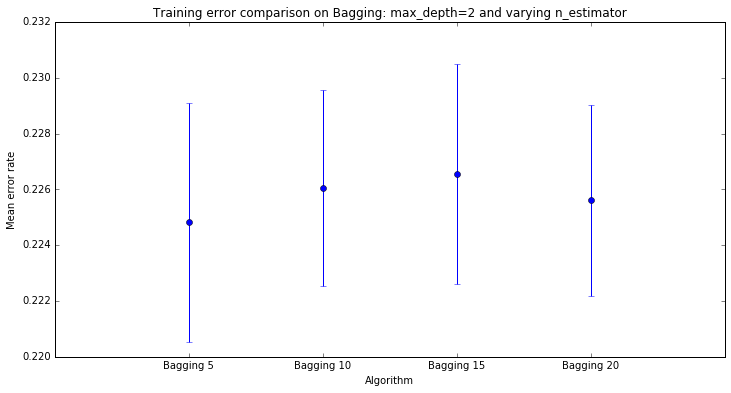

In [39]:
tr_errors = [('Bagging 5',bag5_2_tr_err), ('Bagging 10',bag10_2_tr_err), 
             ('Bagging 15',bag15_2_tr_err), ('Bagging 20',bag20_2_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Bagging: max_depth=2 and varying n_estimator')

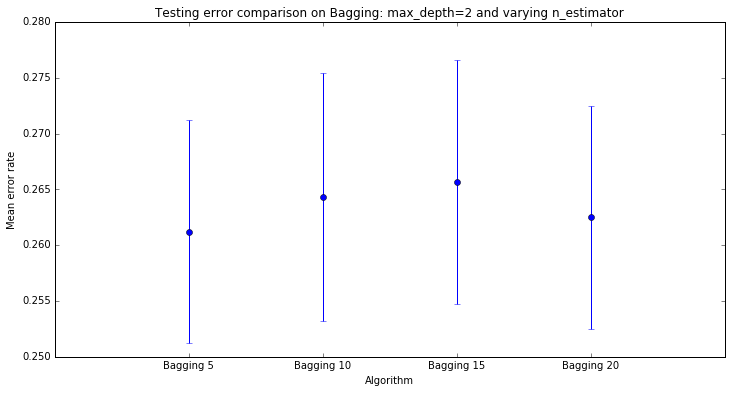

In [40]:
ts_errors = [('Bagging 5',bag5_2_ts_err), ('Bagging 10',bag10_2_ts_err), 
             ('Bagging 15',bag15_2_ts_err), ('Bagging 20',bag20_2_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=2 and varying n_estimator')

**Comentarios u observaciones:**
- Para ambos casos (training y testing) se nota una mejora al aumentar la cantidad de máquinas, siendo esta más pronunciada en el conjunto de entrenamiento.
- Como ya se nombró anteriormente, esto cumple con el concepto de _Wisdom of crowds_, pues al aumentar la cantidad de máquinas (entrenadas con muestras bootstrap), se añade diversidad y se está mejorando la capacidad de generalización del ensamblado.

### Bagging con árboles de profundidad 3

In [41]:
#bagging with 5 trees of depth 3
clf = Bagging(n_estimators=5, max_depth=3)
bag5_3_tr_err, bag5_3_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 10 trees of depth 3
clf = Bagging(n_estimators=10, max_depth=3)
bag10_3_tr_err, bag10_3_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 15 trees of depth 3
clf = Bagging(n_estimators=15, max_depth=3)
bag15_3_tr_err, bag15_3_ts_err = solve_clf(clf, scale=False, show=[])
#bagging with 20 trees of depth 3
clf = Bagging(n_estimators=20, max_depth=3)
bag20_3_tr_err, bag20_3_ts_err = solve_clf(clf, scale=False, show=[])

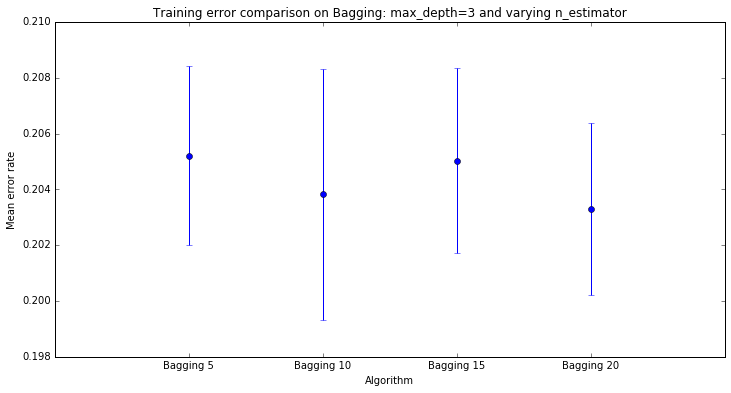

In [42]:
tr_errors = [('Bagging 5',bag5_3_tr_err), ('Bagging 10',bag10_3_tr_err), 
             ('Bagging 15',bag15_3_tr_err), ('Bagging 20',bag20_3_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison on Bagging: max_depth=3 and varying n_estimator')

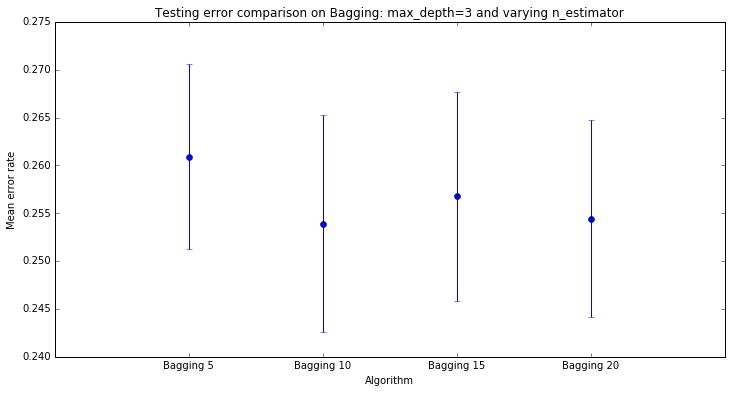

In [43]:
ts_errors = [('Bagging 5',bag5_3_ts_err), ('Bagging 10',bag10_3_ts_err), 
             ('Bagging 15',bag15_3_ts_err), ('Bagging 20',bag20_3_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison on Bagging: max_depth=3 and varying n_estimator')

**Comentarios u observaciones:**
- Sucede lo mismo que para el caso de árboles de profundidad 2 (para training y testing error).

### Comparación de Bagging para distinta profundidad de árbol y número de máquinas

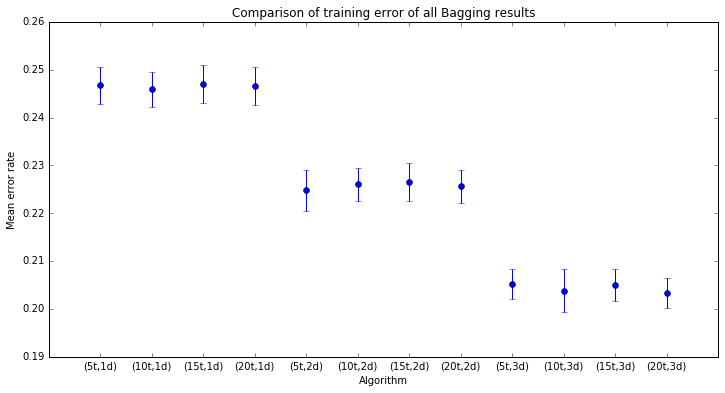

In [44]:
tr_errors = [('(5t,1d)',bag5_1_tr_err),('(10t,1d)',bag10_1_tr_err),('(15t,1d)',bag15_1_tr_err),
             ('(20t,1d)',bag20_1_tr_err),('(5t,2d)',bag5_2_tr_err),('(10t,2d)',bag10_2_tr_err),
             ('(15t,2d)',bag15_2_tr_err),('(20t,2d)',bag20_2_tr_err),('(5t,3d)',bag5_3_tr_err),
             ('(10t,3d)',bag10_3_tr_err),('(15t,3d)',bag15_3_tr_err),('(20t,3d)',bag20_3_tr_err)]
plot_errorbars(tr_errors, "Comparison of training error of all Bagging results")

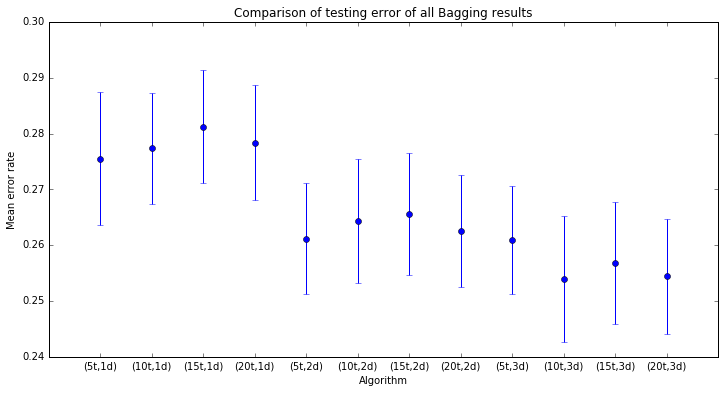

In [45]:
ts_errors = [('(5t,1d)',bag5_1_ts_err),('(10t,1d)',bag10_1_ts_err),('(15t,1d)',bag15_1_ts_err),
             ('(20t,1d)',bag20_1_ts_err),('(5t,2d)',bag5_2_ts_err),('(10t,2d)',bag10_2_ts_err),
             ('(15t,2d)',bag15_2_ts_err),('(20t,2d)',bag20_2_ts_err),('(5t,3d)',bag5_3_ts_err),
             ('(10t,3d)',bag10_3_ts_err),('(15t,3d)',bag15_3_ts_err),('(20t,3d)',bag20_3_ts_err)]
plot_errorbars(ts_errors, "Comparison of testing error of all Bagging results")


**Comentarios u observaciones:**
- Se sigue la misma notación que en los gráficos para Adaboost.
- A diferencia de Adaboost, Bagging está mejorando sus resultados (para training y testing) a medida que aumenta la profundidad de los árboles y la cantidad de máquinas.
- Lo anterior nos dice que, tener learners más complejos y entrenados agregando diversidad, mejora la capacidad de predicción (generalización) del ensamblado.
- La configuración que mejor se comporta (menor testing error) es: 20 árboles con profundidad 3.


## 7. Comparaciones

En la siguiente sección se comparan todos los resultados obtenidos anteriormente. Para el caso de Adaboost y Bagging, en donde hay varios resultados (dependiendo de la configuración de número de máquinas y profundidad de árbol), se comparan aquellos que presentan mejor desempeño (menor testing error) en cada caso:
- Adaboost: 5 árboles de profundidad 2.
- Bagging: 20 árboles de produndidad 3.

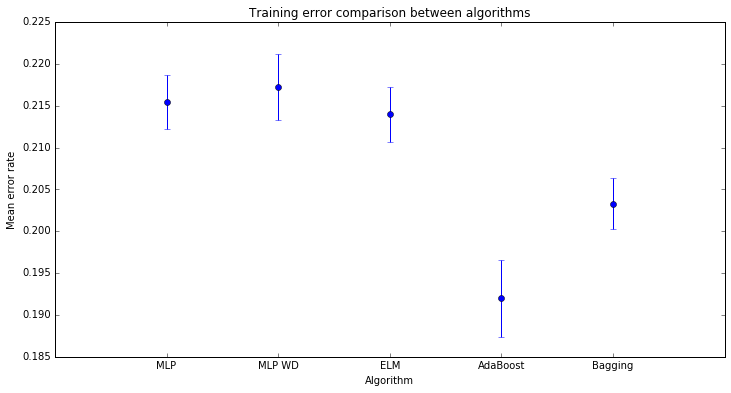

In [46]:
tr_errors = [('MLP',mlp_tr_err),('MLP WD',mlp_wd_tr_err),('ELM',elm_tr_err),
             ('AdaBoost',ada5_2_tr_err), ('Bagging',bag20_3_tr_err),]
plot_errorbars(tr_errors, title='Training error comparison between algorithms')

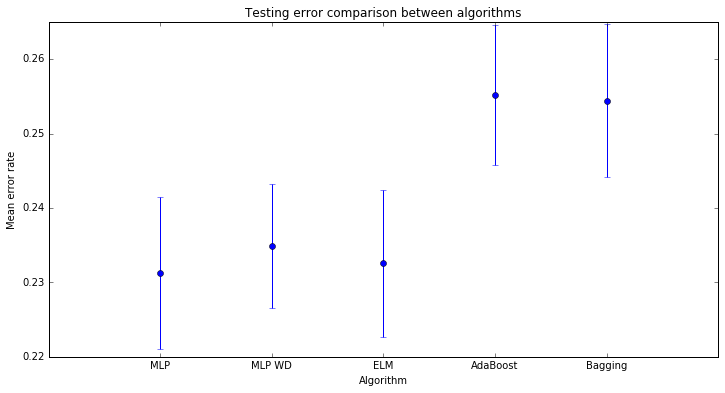

In [47]:
ts_errors = [('MLP',mlp_ts_err),('MLP WD',mlp_wd_ts_err),('ELM',elm_ts_err),
             ('AdaBoost',ada5_2_ts_err), ('Bagging',bag20_3_ts_err),]
plot_errorbars(ts_errors, title='Testing error comparison between algorithms')

**Comentarios u observaciones:**
- La red Feedforward con weight decay (MLP WD) es la que mejor resultado obtiene entre todos los algoritmos (menor testing error).
- De esta última se observa también que mejora respecto a su versión sin peso (MLP). Por lo tanto la regularización está permitiendo aumentar la capacidad de generalización de la red.
- A pesar de la simplicidad de la ELM en cuanto a su entrenamiento, presenta resultados muy buenos y cercanos a los que obtienen las redes Feedforward. Sin embargo hay que destacar que el tiempo de entrenamiento de esta, es mucho menor a los tiempos de las redes Feedforward, gracias a que los pesos de la capa oculta no deben ser aprendidos.
- Ambos algoritmos de ensamblado, no logran superar en desempeño a los algoritmos de redes neuronales.
- Bagging tiene un leve mejor desempeño que Adaboost. 
- Lo último puede ser un indicio de que la data tiene ruido o outliers, pues se sabe que Bagging funciona mejor en estas condiciones. 
- Adaboost es sin embargo el algoritmo que menor training error alcanza (seguido por Bagging). Luego se puede concluir que ambos están realizando overfitting del training set, lo cual explica sus altos errores en el testing set.

## Extra: Cross-Validation en Adaboost y Bagging

No contento con los resultados obtenidos de los ensamblados, en realiza a continuación el tunning de los parámetros por medio del correspondiente cross-validation.

- Para Adaboost, se realiza cross-validation sólo sobre n_estimators. Como se vio en los resultados anteriores, Adaboost tiende al overfitting con árboles de mucha profundidad, por lo tanto este parámetro se mantiene fijo en max_depth=2 (con el cual obtuvo los mejores resultados anteriormente).
- Para Bagging, se realiza cross-validation sólo sobre n_estimators. Inicialmente se hizo también sobre max_depth, pero cross-validation seleccionaba valores muy altos que generaban overfitting. Por lo tanto se dejó max_depth=3 (con el cual obtuvo los mejores resultados anteriormente).

##############################################################
Dataset: 2
Best parameter: {'n_estimators': 25}
CV scores:
mean: 0.78125, std: 0.04357, params: {'n_estimators': 25}
mean: 0.78125, std: 0.03994, params: {'n_estimators': 50}
mean: 0.77257, std: 0.03717, params: {'n_estimators': 75}
mean: 0.77951, std: 0.04464, params: {'n_estimators': 100}
mean: 0.77257, std: 0.04045, params: {'n_estimators': 125}
Training error: 0.196180555556
Testing error: 0.296875
##############################################################


##############################################################
Dataset: 17
Best parameter: {'n_estimators': 100}
CV scores:
mean: 0.77431, std: 0.02752, params: {'n_estimators': 25}
mean: 0.78125, std: 0.02217, params: {'n_estimators': 50}
mean: 0.77604, std: 0.03002, params: {'n_estimators': 75}
mean: 0.78299, std: 0.02560, params: {'n_estimators': 100}
mean: 0.77257, std: 0.03107, params: {'n_estimators': 125}
Training error: 0.1875
Testing error: 0.3072916666

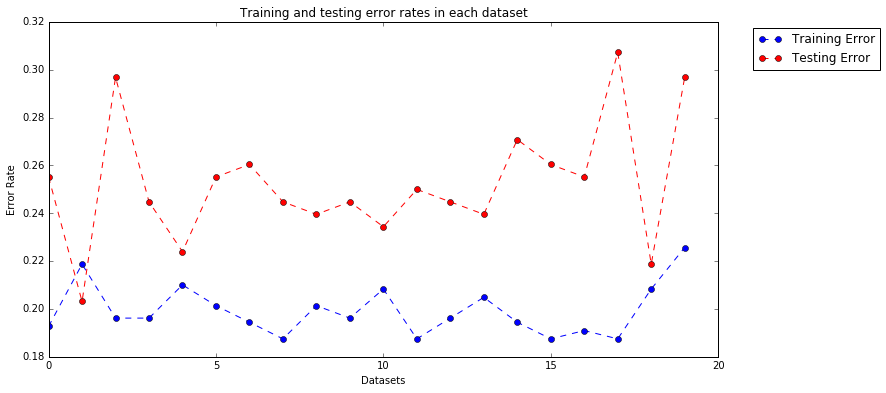

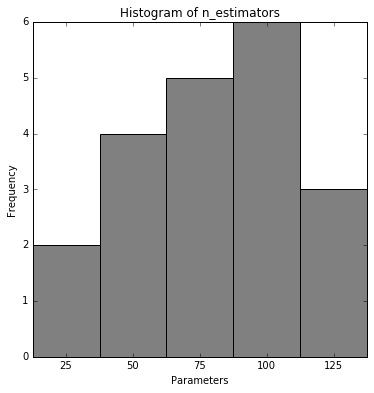

In [48]:
#parameters to try on Bagging
bagging_params = {'n_estimators':[25,50,75,100,125]}
bag = Bagging(max_depth=3)
bagging_tr_err, bagging_ts_err = solve_clf(bag, params=bagging_params, show=[2,17])

##############################################################
Dataset: 0
Best parameter: {'n_estimators': 170, 'learning_rate': 1.0}
CV scores:
mean: 0.76042, std: 0.03638, params: {'n_estimators': 5, 'learning_rate': 0.10000000000000001}
mean: 0.76042, std: 0.03810, params: {'n_estimators': 20, 'learning_rate': 0.10000000000000001}
mean: 0.74479, std: 0.04011, params: {'n_estimators': 35, 'learning_rate': 0.10000000000000001}
mean: 0.74306, std: 0.02252, params: {'n_estimators': 50, 'learning_rate': 0.10000000000000001}
mean: 0.74479, std: 0.02692, params: {'n_estimators': 65, 'learning_rate': 0.10000000000000001}
mean: 0.74479, std: 0.02518, params: {'n_estimators': 80, 'learning_rate': 0.10000000000000001}
mean: 0.73438, std: 0.02696, params: {'n_estimators': 95, 'learning_rate': 0.10000000000000001}
mean: 0.73785, std: 0.02181, params: {'n_estimators': 110, 'learning_rate': 0.10000000000000001}
mean: 0.73785, std: 0.02110, params: {'n_estimators': 125, 'learning_rate': 0.100000000

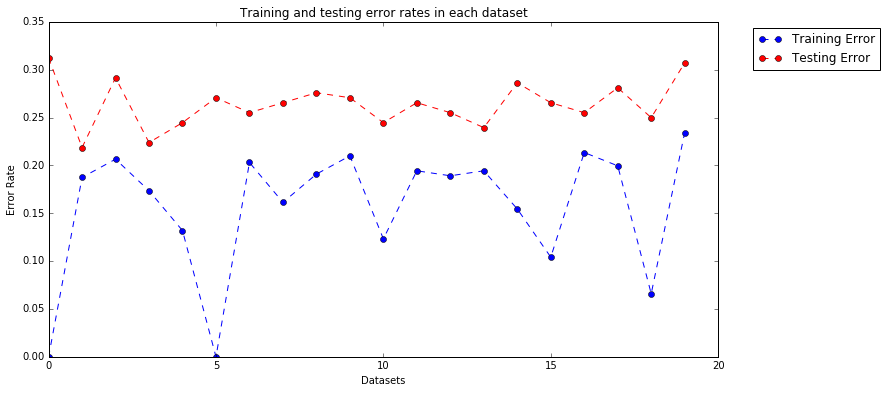

In [66]:
#parameters to try on Adaboost
adaboost_params = {'n_estimators':np.arange(5,250,15),'learning_rate':np.arange(0.1,1.1,0.1)}
ada = AdaBoost(base_estimator=DecisionTree(max_depth=2))
adaboost_tr_err, adaboost_ts_err = solve_clf(ada, params=adaboost_params, verbose=True, show=[3,17])

### Comparación de resultados en training set

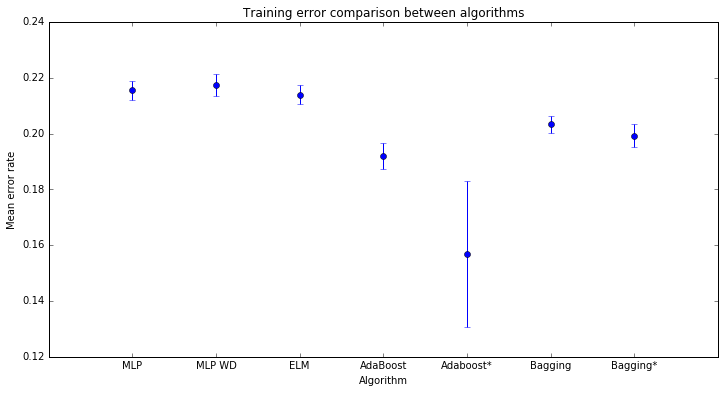

In [67]:
tr_errors = [('MLP',mlp_tr_err),('MLP WD',mlp_wd_tr_err),('ELM',elm_tr_err),('AdaBoost',ada5_2_tr_err),
             ('Adaboost*',adaboost_tr_err), ('Bagging',bag20_3_tr_err),('Bagging*',bagging_tr_err)]
plot_errorbars(tr_errors, title='Training error comparison between algorithms')

### Comparación de resultados en testing set

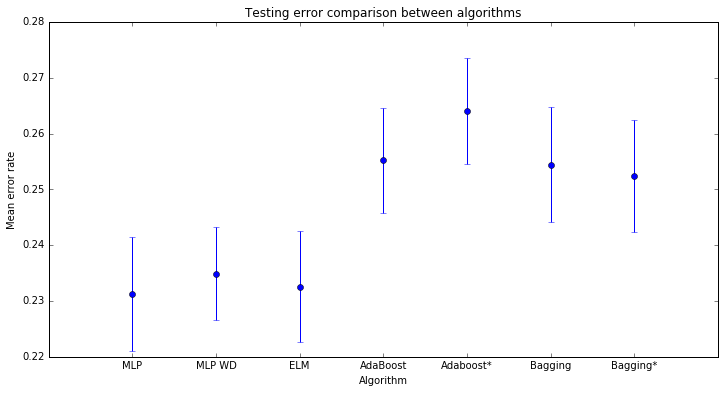

In [68]:
ts_errors = [('MLP',mlp_ts_err),('MLP WD',mlp_wd_ts_err),('ELM',elm_ts_err),('AdaBoost',ada5_2_ts_err), 
             ('Adaboost*',adaboost_ts_err),('Bagging',bag20_3_ts_err),('Bagging*',bagging_ts_err)]
plot_errorbars(ts_errors, title='Testing error comparison between algorithms')

**Comentarios u observaciones:**
- Los resultados Adaboost\* y Bagging\* son los obtenidos con el tunning de parámetros por cross-validation.
- Como se puede apreciar, hay una mejorar en ambos algoritmos en cuanto al error de testing set.
- Ambos algoritmos obtuvieron los mejores resultados con n_estimators=50 máquinas. Uno esperaría que por lo menos Bagging obtuviese mejores resultados con el máximo número de learners, pero cross-validation no apoya este razonamiento. 
- El error de training de Adaboost\* subió considerablemente, motivo por lo cual el de testing disminuyó.
- Pese a que los resultados son mejores, aún así no logran acercarse a los obtenidos con redes neuronales.
- Se puede concluir entonces que, ocupar árboles de decisión como learners de los ensamblados no tiene tan buenos resultados en este dataset. Sería interesante probar con algún learner distinto (como SVM's) para apreciar si existen mejoras.

## Anexo de Código

**Observación:** Para la correcta ejecución del código en el informe, primero se deben ejecutar las celdas del anexo de código aquí abajo.

### Configuración del notebook

In [11]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numpy as np
import scipy as sp
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.ensemble import AdaBoostClassifier as AdaBoost

## Métricas de error para clasificación

In [4]:
#precision
def precision(yreal, ypred):
    yr = yreal.astype(int)
    yp = ypred.astype(int) 
    m, = yr.shape
    #number of good predictions/number of predictions
    return np.sum(yp==yr)/float(m)

#error rate 
def error_rate(yreal, ypred):
    return 1.-precision(yreal, ypred)

## Funciones complementarias (helpers) para obtener resultados

In [58]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    for key in winners:
        par = params[key]
        win = np.array(winners[key])
        freqs = np.zeros(5)
        for i in xrange(5):
            freqs[i] = np.sum(par[i]==win)
        labels = map(str,par)
        pos = np.arange(len(labels))
        width = 1.0
        fig = plt.figure()
        fig.set_figheight(6)
        fig.set_figwidth(6)
        ax = plt.axes()
        ax.set_xticks(pos + (width / 2))
        ax.set_xticklabels(labels)
        plt.xlabel('Parameters')
        plt.ylabel('Frequency')
        plt.title('Histogram of {0}'.format(key))
        plt.bar(pos, freqs, width, color='0.5')
        plt.show()
    
def plot_error(tr_err, ts_err):
    x = np.arange(20)
    plt.figure(figsize=(12,6))
    plt.plot(x, tr_err, marker='o', linestyle='--', color='b', label='Training Error')
    plt.plot(x, ts_err, marker='o', linestyle='--', color='r', label='Testing Error')
    plt.xlabel('Datasets')
    plt.ylabel('Error Rate')
    plt.title('Training and testing error rates in each dataset')
    plt.legend(bbox_to_anchor=(1.25, 1.0))
    plt.show()
    

def mean_confidence_interval(data, confidence=0.9):
    #computing confidence interval
    n = data.shape[0]
    mu = np.mean(data)
    sem = sp.stats.sem(data)
    h1,h2 = sp.stats.t.interval(confidence, n-1, loc=mu, scale=sem)
    return mu, h1, h2

def mean_percentile(data, inf=10, sup=90):
    mu = np.mean(data)
    h1, h2 = np.percentile(data, [10,90])
    return mu, h1, h2

def plot_errorbars(errors, title=None):
    mean = []
    lower = []
    upper = []
    labels = []
    for label,error in errors:
        mu,l,u = mean_confidence_interval(error)
        #mu,l,u = mean_percentile(error)
        mean.append(mu)
        lower.append(l)
        upper.append(u)
        labels.append(label)
    x = np.arange(3, len(errors)+3)
    mean = np.array(mean)
    lower = mean-np.array(lower)
    upper = np.array(upper)-mean
    plt.figure(figsize=(12,6))
    plt.xlim([2,len(errors)+3])
    plt.xticks(x, labels)
    plt.errorbar(x, mean, yerr=[lower,upper],fmt='o')
    plt.xlabel('Algorithm')
    plt.ylabel('Mean error rate')
    plt.title(title)
    plt.show()

"""
Generate solutions for classification problems
"""
def solve_clf(clf, params=None, scale=True, verbose=True, show=None):
    if params is not None:
        winners = dict()
        for key in params:
            winners[key] = list()
            
    #set dataset name
    path = './diabetes/diabetes'
    
    #error-rates to plot
    tr_err = np.empty(20)
    ts_err = np.empty(20)
    
    #iterate through data
    for i in xrange(20):
        #loading datasets
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
            
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if scale:
            #perform same scaling on training and testing sets
            scaler = StandardScaler()
            scaler.fit(tr_data[:,:-1])
            X_tr = scaler.transform(tr_data[:,:-1])
            X_ts = scaler.transform(ts_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
            X_ts = ts_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        y_ts = np.ascontiguousarray(ts_data[:,-1])

        if params is not None:
            #tunning parameters
            gs = GridSearchCV(clf, params, cv=5, n_jobs=2)
            gs.fit(X_tr, y_tr)
            grid_scores = gs.grid_scores_
            best_params = gs.best_params_
            for key in winners:
                bparam = best_params[key]
                if type(bparam)==tuple:
                    winners[key].append(bparam[0])
                else:
                    winners[key].append(bparam)
            #traininig with best parameters
            clf.set_params(**best_params)
            clf.fit(X_tr, y_tr)
        else:
            clf.fit(X_tr, y_tr)
        
        #computing errors
        tr_err[i] = error_rate(y_tr, clf.predict(X_tr))
        ts_err[i] = error_rate(y_ts, clf.predict(X_ts))
        
        if (not verbose) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best parameter: {0}'.format(best_params)
            print 'CV scores:'
            for result in grid_scores: print result
        print 'Training error: {0}'.format(tr_err[i])
        print 'Testing error: {0}'.format(ts_err[i])
        print "##############################################################"
        print '\n'
    
    #ploting errors
    if verbose: 
        plot_error(tr_err, ts_err)
        #if params is not None: make_hist(winners, params)
    return (tr_err,ts_err)

## Implementación de Extreme Learning Machine

In [6]:
def sigmoid(z):
    return 1./(1.+np.exp(-z))

In [7]:
class ELM(BaseEstimator, ClassifierMixin):
    def __init__(self, n_hidden=10, activation=sigmoid):
        self.n_hidden = n_hidden
        self.activation = activation
    
    def fit(self, X, y):
        #creating a random matrix W with the weights of the hidden layer
        #weights are between -0.5 and 0.5
        M,I = X.shape
        W = np.random.random((I,self.n_hidden))
        W -= 0.5
        #storing it in the object attribute
        self.W = W
        
        #computing output values of hidden nodes
        H = self.activation(np.dot(X,W))
        
        #softmax-logistic regression
        clf = LogisticRegression()
        clf.fit(H,y)
        self.clf = clf
        return self
    
    def predict(self, X):
        H = self.activation(np.dot(X,self.W))
        return self.clf.predict(H)
    
    def score(self, X, y):
        H = self.activation(np.dot(X,self.W))
        return self.clf.score(H,y)

## Implementación de Bagging

In [8]:
class Bagging(BaseEstimator,ClassifierMixin):
    def __init__(self, n_estimators=5, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        
    def fit(self, X, y):
        #list where estimators will be stored
        estimators = []
        #indexes of X
        ind = np.arange(X.shape[0])
        #fitting all the classifiers
        for i in xrange(self.n_estimators):
            #bootstraped indexes
            b_ind = resample(ind, replace=True)
            clf = DecisionTree(max_depth=self.max_depth)
            clf.fit(X[b_ind], y[b_ind])
            estimators.append(clf)
        #storing results
        self.estimators = estimators
        return self
    
    def predict(self, X):
        #array with probabilies of classes
        prob = np.zeros((X.shape[0],2))
        for clf in self.estimators:
            prob += clf.predict_proba(X)
        #taking average probability
        prob /= self.n_estimators
        return np.argmax(prob, axis=1)
    
    def score(self, X, y):
        ypred = self.predict(X)
        return precision(y, ypred)